# Feature Engineering with Time Series

In [1]:
import seaborn as sns
import pandas as pd

In [2]:
df = sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


#### Technique 1: Put a timestamp in the index column

In [4]:
ts = pd.to_datetime(df['month'].astype(str) + ' ' + df['year'].astype(str))
df.set_index(ts, inplace=True)
df.head()

,year,month,passengers
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


<AxesSubplot:>

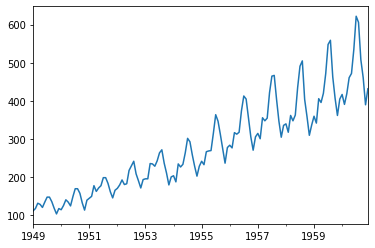

In [5]:
df['passengers'].plot()

#### Technique 2: Calculate Differences

<AxesSubplot:>

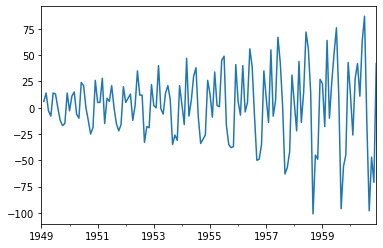

In [6]:
df['diff'] = df['passengers'].diff() # removes the trend
df['diff'].plot()

<AxesSubplot:>

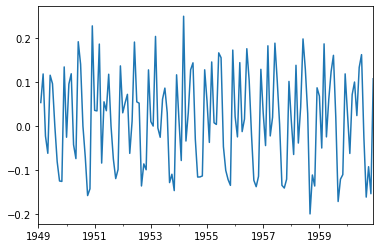

In [7]:
df['pct'] = df['passengers'].pct_change() # calculate percent change, removes change in variation
df['pct'].plot()

#### Technique 3: Extract Seasonality

In [8]:
season = df.groupby('month')['pct'].mean()
season

month
Jan    0.025745
Feb   -0.010453
Mar    0.151735
Apr   -0.020056
May    0.008571
Jun    0.142526
Jul    0.121226
Aug    0.001147
Sep   -0.125067
Oct   -0.120018
Nov   -0.124927
Dec    0.132474
Name: pct, dtype: float64

<AxesSubplot:>

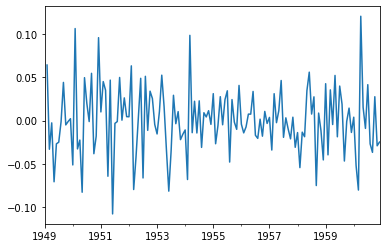

In [9]:
df['no-season'] = df['pct'] - df['month'].replace(season)
df['no-season'].plot()  # no trend, no variation change, no seasonality

<AxesSubplot:>

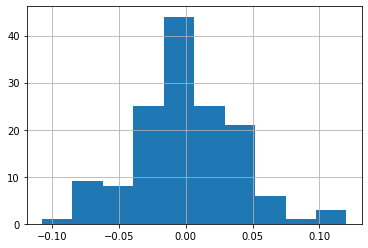

In [10]:
df['no-season'].hist()  # we end up with something close to random noise

#### Technique 4: interpolating gaps

<AxesSubplot:>

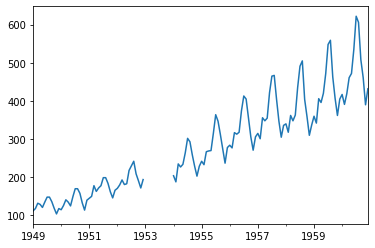

In [22]:
df['passenger_gap'] = df['passengers']
df.loc['1953-01':'1953-12', 'passenger_gap'] = None
df['passenger_gap'].plot()

many advanced time series models (exponential smoothing, ARIMA) assume:

$y_{t+1} = f(y_t)$

<AxesSubplot:>

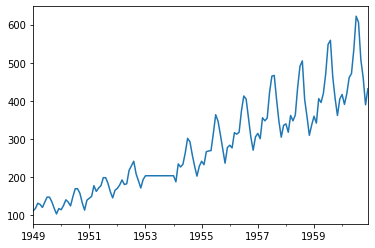

In [12]:
df['passenger_gap'].fillna(method='bfill').plot() # also 'ffill'

<AxesSubplot:>

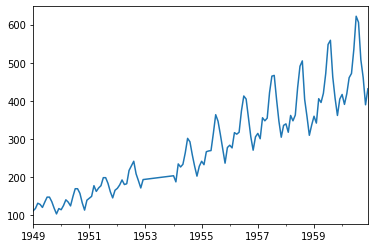

In [13]:
df['passenger_gap'].interpolate(method='linear').plot()

In [17]:
before = df.loc[df['year']==1952, 'passengers']
after = df.loc[df['year']==1954, 'passengers']

patch = (before.values + after.values) / 2
patch

array([187.5, 184. , 214. , 204. , 208.5, 241. , 266. , 267.5, 234. ,
       210. , 187.5, 211.5])

In [15]:
df.loc[df['year']==1953, 'passenger_gap'] = patch

<AxesSubplot:>

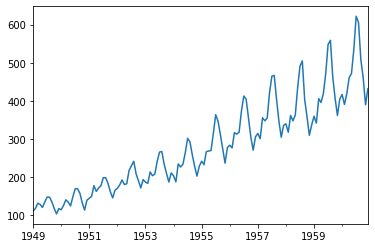

In [16]:
df['passenger_gap'].plot()